<a href="https://colab.research.google.com/github/Pradip240/IPL-T20-Cricket-Analysis/blob/main/IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

# What is IPL?

It is a shortened format of cricket. At the professional level, it was introduced by the England and Wales Cricket Board (ECB) in 2003 for the inter-county competition. In a Twenty20 game, the two teams have a single innings each, which is restricted to a maximum of 20 overs.

Twenty20 is one of the three current forms of cricket recognised by the International Cricket Council (ICC) as being at the highest international or domestic level.

A typical Twenty20 game is completed in about three hours, with each innings lasting around 90 minutes and an official 10-minute break between the innings. This is much shorter than previous forms of the game, and is closer to the timespan of other popular team sports. It was introduced to create a fast-paced game that would be attractive to spectators at the ground and viewers on television

In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube

Lets, Explore what features the data is containing.

#Let's load and explore the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ast import literal_eval
from scipy.stats import norm
%matplotlib inline

In [ ]:
# Input file path 
path = '/content/drive/MyDrive/Capstone Project/'
# individual data frame
players_df = pd.read_excel(path + 'Players.xlsx')
deliveries_df = pd.read_csv(path + 'deliveries.csv')
matches_df = pd.read_csv(path + 'matches.csv')
teams_df = pd.read_csv(path + 'teams.csv')
most_runs_average_strikerate_df = pd.read_csv(path + 'most_runs_average_strikerate.csv')
teamwise_home_and_away_df = pd.read_csv(path + 'teamwise_home_and_away.csv')

In [ ]:
#Checking the shape of multiple datasets
ipl_df=[matches_df.shape, players_df.shape, deliveries_df.shape, teams_df.shape, most_runs_average_strikerate_df.shape, teamwise_home_and_away_df.shape]
ipl_df


[(756, 18), (566, 5), (179078, 21), (15, 1), (516, 6), (14, 7)]

##So what can we expect from the multiple IPL datasets?
###The datasets are:
####1.matches.csv
####2.Players.xlsx
####3.deliveries.csv
####4.teams.csv
####5.most_runs_average_strikerate.csv
####6.teamwise_home_and_away.csv
####In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.
####The datsets consists of multiple observations & columns. Let's go ahead & get familiar with the columns.

##Cleaning the dataset

##From matches dataset we have:-
####**ID:** Basically the IPL match ID.
####**Season:** The IPL season, which in our dataset if from season 2008 - season 2019
####**City:**The cities where the IPL matches were played.
####**Date:** The date on which the matches were played or held.
####**Team1 & Team2:** The teams participated in the IPL matches since 2008.
####**Toss_winner:** The team that won the toss.
####**Toss_decision:** The decision taken by the toss winning team either to 'Bat' or 'Field' first.
####**Result:** The result column consists of (normal, tie, no result) of the match.
####**Dl_applied:** The column consists the numerical values (0 or 1) which indicates whether the Duckworth-Lewis method was applied or not.
####**Winner:** Winner of the respective match.
####**Win_by_runs:** The runs by which the team batting first won.
####**Win_by_wickets:** The wickets by which the team batting second won.
####**Player_of_the_match:** The player who performed exceptionally good in the match.
####**Venue:** The venue where the match was hosted.
####**Umpire1 & Umpire2:** Two on-field umpires during the match.
####**Umpire3:** Basically the third Umpire.

##Matches Dataset

In [ ]:
#Checking the first five observations of matches dataset
matches=matches_df.head()
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
#Checking for the null values in the data
missing_val_matches = matches_df.isnull()
missing_val_matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
754,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#suming up the null values together
matches_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

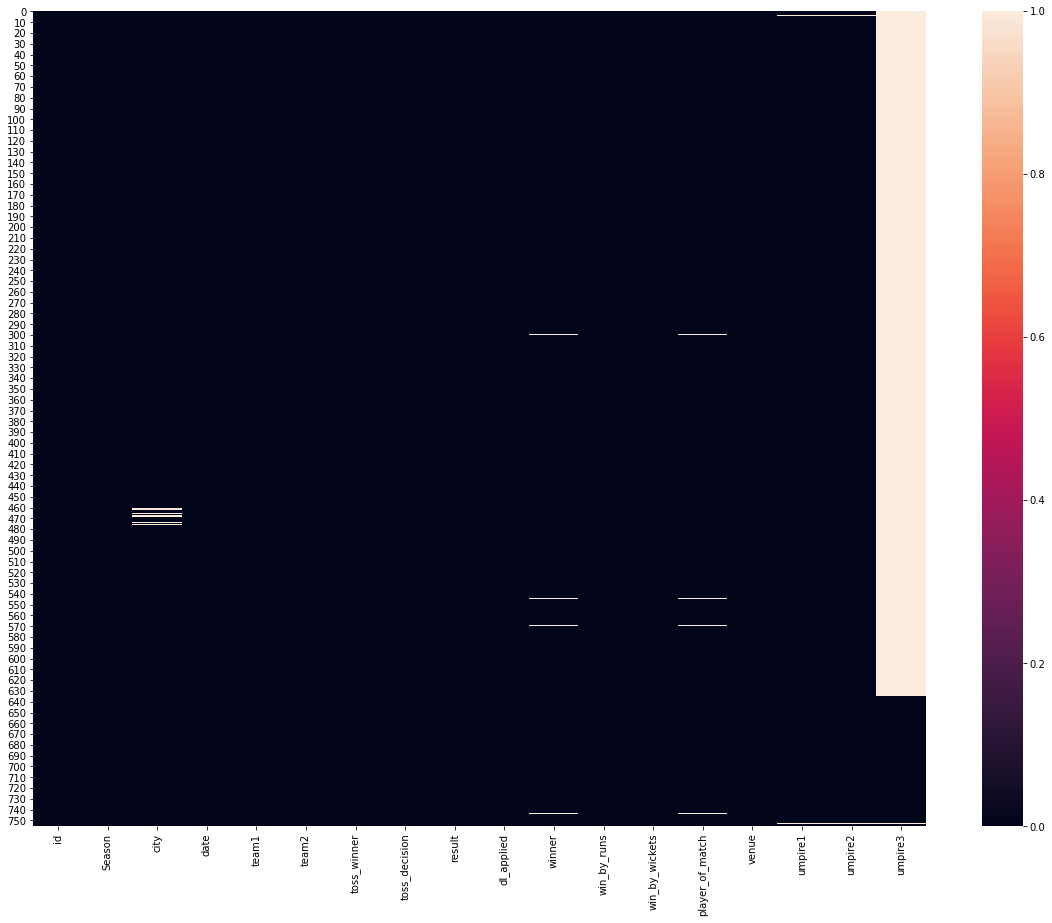

In [ ]:
#Plotting the heatmap for the missing values in the matches dataset
plt.figure(figsize=(20,15))
sns.heatmap(missing_val_matches)

In [ ]:
#Filling up the numerical missing values
filling_na_matches = matches_df.fillna(matches_df.mean(axis=0))

In [ ]:
filled_val_matches = filling_na_matches.isnull()

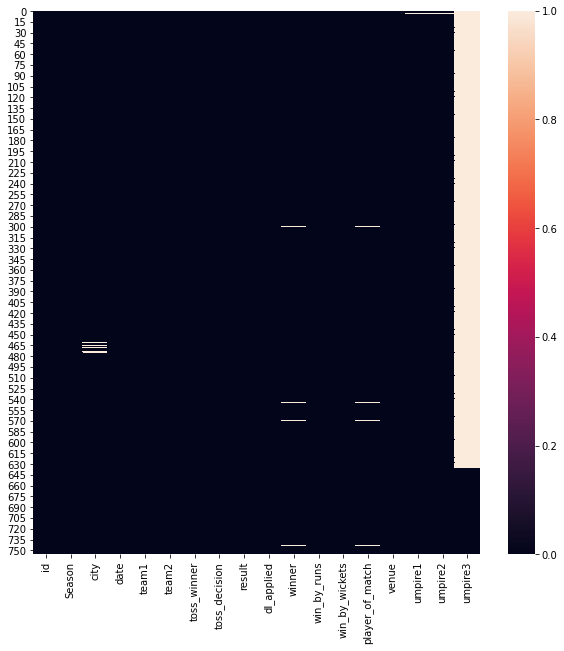

In [ ]:
#Plotting the heatmap after filling up the missing numerical values
plt.figure(figsize=(10,10))
sns.heatmap(filled_val_matches)

In [ ]:
#Filling up the categorical missing values
filling_na_categorical = matches_df.fillna(matches_df.mode().iloc[0])

In [ ]:
filling_na_categorical.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [ ]:
filled_val1 = filling_na_categorical.isnull()

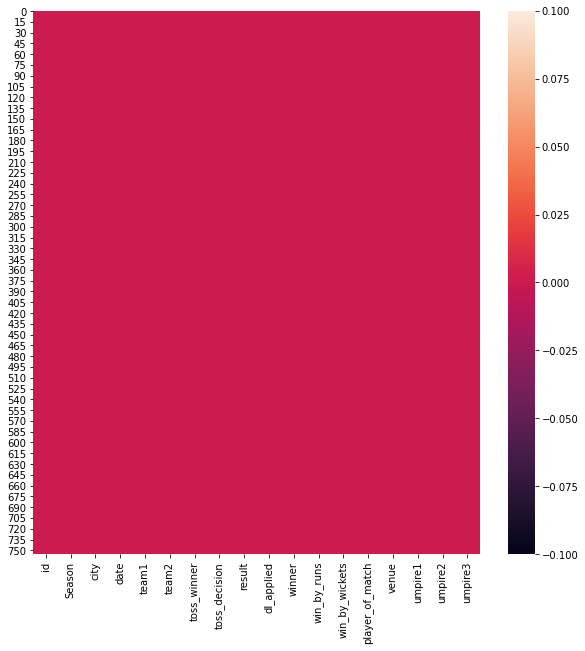

In [ ]:
#Plotting the heatmap after filling up the missing categorical values
plt.figure(figsize=(10,10))
sns.heatmap(filled_val1)

#Players Dataset

##From the players dataset:-(rows 556, columns 5)
####*It consists of following columns- player_name, DOB, Batting_skill, Bowling_skill & Country.

In [ ]:
#Checking the first five observations of players dataset
players = players_df.head()
players

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [ ]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


In [ ]:
#Finding the unique values from the column Batting Hand
players_df.Batting_Hand.unique()

array(['Right_Hand', 'Right_hand', 'Left_Hand', nan], dtype=object)

In [ ]:
# #Replacing the names which were misspelled in the column Batting Hand
players_df.replace(to_replace='Right_hand', value = 'Right_Hand', inplace=True)
players_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
count,566,471,563,502,471
unique,566,457,2,16,11
top,ST Jayasuriya,1987-04-30 00:00:00,Right_Hand,Right-arm medium,India
freq,1,3,421,107,264
first,NaN,1969-06-30 00:00:00,NaN,NaN,NaN
last,NaN,1998-07-18 00:00:00,NaN,NaN,NaN


In [ ]:
#Checking for the unique values after replacing the names from batting hand
players_df.Batting_Hand.unique()

array(['Right_Hand', 'Left_Hand', nan], dtype=object)

In [ ]:
#Suming up all the missing values
players_df.isnull().sum()

#As we can see all the missing values are categorical

Player_Name       0
DOB              95
Batting_Hand      3
Bowling_Skill    64
Country          95
dtype: int64

In [ ]:
show = players_df.isnull()

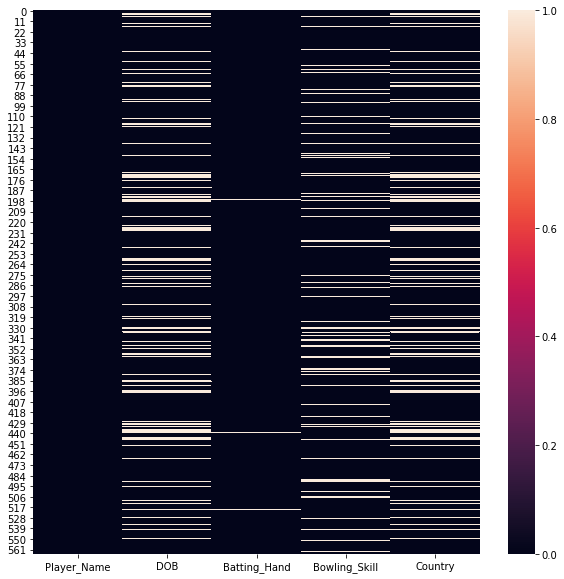

In [ ]:
#Plotting the heatmap for the missing values in the players dataset
plt.figure(figsize=(10,10))
sns.heatmap(show)

In [ ]:
#Filling up the caetgorical missing values
filling_na_cat1 = players_df.fillna(players_df.mode().iloc[0])

In [ ]:
show1 = filling_na_cat1.isnull()

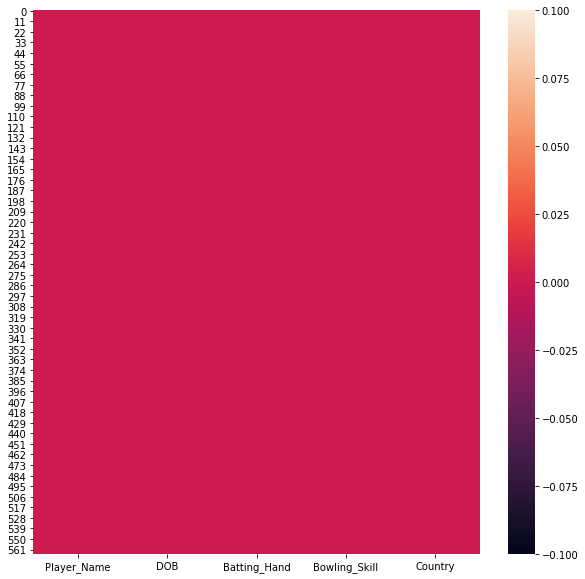

In [ ]:
#Plotting the heatmap after filling up the missing categorical values
plt.figure(figsize=(10,10))
sns.heatmap(show1)

#Deliveries Dataset

##From the deliveries dataset:-(rows 179078, columns 21)
####*It consists of following columns- match_id, inning, batting_team, bowling_team, over, ball, batsman, non_striker, bowler, is_super_over, wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs, batsman_runs, extra_runs, total_runs, player_dismissed, dismissal_kind, fielder.

In [ ]:
#Checking the first five observations of deliveries dataset
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
#Summing up the null values
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
show2 = deliveries_df.isnull()

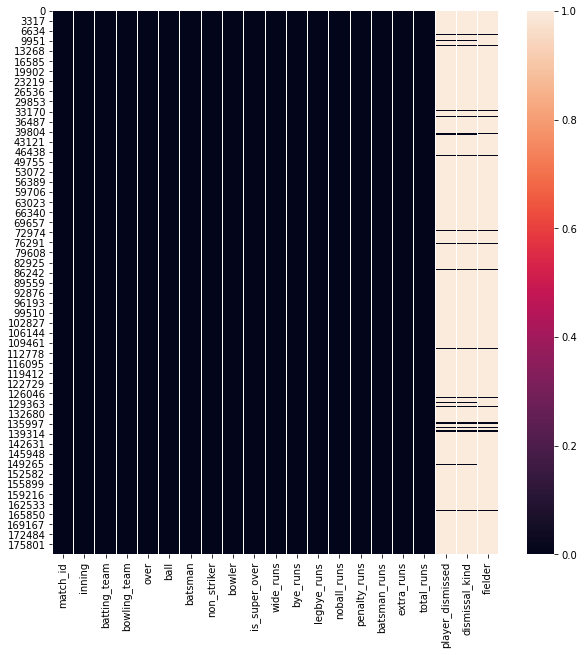

In [ ]:
#Plotting the heatmap for the missing values in the deliveries dataset
plt.figure(figsize=(10,10))
sns.heatmap(show2)

##As seen above the fielder column has significant amount of missing values, so here we can drop the fielder column.

In [ ]:
#Dropping the fielder column
deliveries_df = deliveries_df.drop(columns =['fielder'], axis=1)

In [ ]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN


In [ ]:
show3 = deliveries_df.isnull()

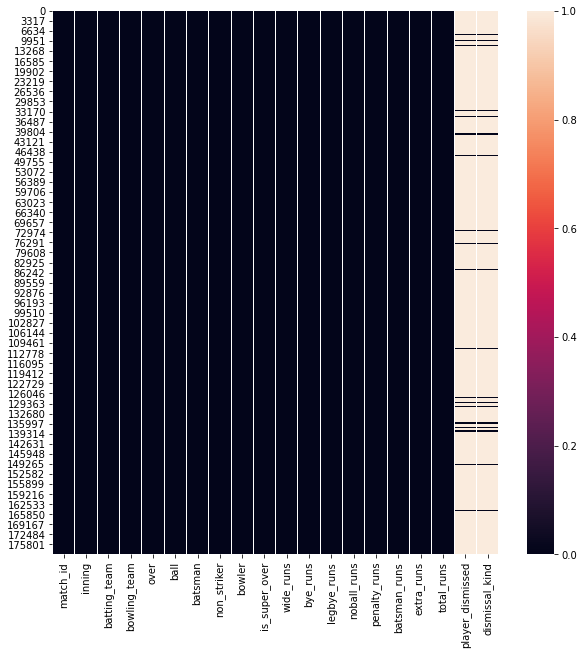

In [ ]:
#Plotting the heatmap after dropping off the fielder column
plt.figure(figsize=(10,10))
sns.heatmap(show3)

#Teams Dataset

##From teams dataset:- (rows 15, column 1)
####*Just has the team names in it.

In [ ]:
#Checking the first ten observations of teams dataset
teams_df.head(10)

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [ ]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [ ]:
teams_df.isnull().sum()

team1    0
dtype: int64

##Teams dataset has 'zero' null values.

#Most_runs_average_strikerate Dataset


##From most_runs_average_strikerate dataset:- (rows 516, columns 6)
####*It consists of following columns- batsman, total_runs, out,	numberofballs, average, strikerate.

In [ ]:
#Checking the first ten observations of most_runs_average_strikerate dataset
most_runs_average_strikerate_df.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


In [ ]:
most_runs_average_strikerate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [ ]:
most_runs_average_strikerate_df.isnull().sum()

batsman           0
total_runs        0
out               0
numberofballs     0
average          34
strikerate        0
dtype: int64

In [ ]:
show4 = most_runs_average_strikerate_df.isnull()

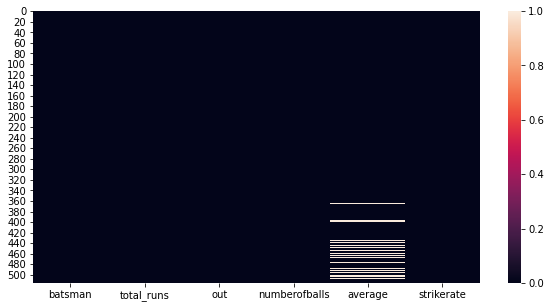

In [ ]:
#Plotting the heatmap for the missing values in the dataset
plt.figure(figsize=(10,5))
sns.heatmap(show4)

In [ ]:
#Treating the missing numerical values
filling_num = most_runs_average_strikerate_df.fillna(most_runs_average_strikerate_df.mean(axis=0))

In [ ]:
show5 = filling_num.isnull()

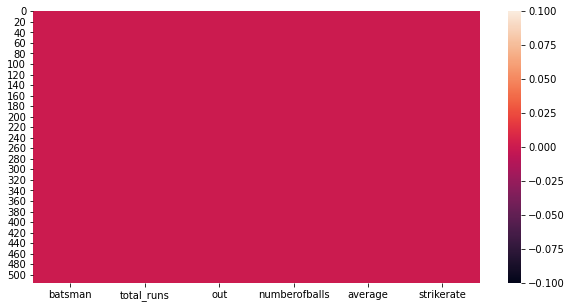

In [ ]:
#Plotting the heatmap for the missing numerical values in the dataset
plt.figure(figsize=(10,5))
sns.heatmap(show5)

#Teamwise_home_and_away Dataset

##From teamwise_home_and_away datset:- (rows 14, columns 7)
####*It consists of following columns- team, home_wins, away_wins, home_matches	away_matches,	home_win_percentage,	away_win_percentage.

In [ ]:
#Checking the first ten observations of teamwise_home_and_away dataset
teamwise_home_and_away_df.head(10)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [ ]:
teamwise_home_and_away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


In [ ]:
teamwise_home_and_away_df.isnull().sum()

team                   0
home_wins              0
away_wins              0
home_matches           0
away_matches           0
home_win_percentage    0
away_win_percentage    0
dtype: int64

##The dataset above has no missing values to treat

##As our dataset has been cleaned, we can now do the in-depth analysis and visualization.

### So what can we Expect at the end of the project:

In order to understand our data, we can look at each of the colums and try to understand their meaning and to find that which sheet will help us to extract the relevance to the problem. I know this is time-consuming, but it will give us the flavour of our datasets.

From the following Datasheets we extracted the following datas:

1.Deliveries: This file helped us to extract the data that .which bowler delievered what type of ball in the specific over during the match

2.Matches: This file extract the data related to which teams were playing in which city and which teams won against the other team with what no of runs and the date the match was played in presence of which umpires.

3.Most run Average Runrate: This file describes the data that which playered played the number of balls and how many time they got out and the number of runs they scored and hence there average run rate for the season.

4.Players: The given excel sheet describes the players related information like what country is the player from what is there batting hand and what is the bowling skill they have.

5.Teams: Which are the teams who have participated in the IPL season.

6.Teams_home_and_away: This shares the data related to the home wins and away wins of the teams participating and the percentage of the same.

When we flaunt around this data sheets it helps us to find each of the following data in some or the other way, We at the end of our Project Expect the following Outputs:
1. The captain of the team performing best

2. No of matches played by a player

3. The player who scored heighest no of boundaries

4. The best opening players

5. Experience of the Player in the perticular team and the past IPL tournament

6. Total number of wickets taken by the bowler in the tornament

7. The average run rate of the player during the entire tournament

8. The best team and there chances to win the tournament

9. The teams that have the chances to enter the semi-finale by analysis of     there players

10. Which venue has the heighest runs history

11. The desired run rate during the second innings

12. The number of wide balls thrown by the bowler

13. The number of No balls thrown by the bowler

14. The chances of toss and hence the extra over.




# Players from different Country

IPL teams have players selected from different countries.

Lets explore players from which countries are included in IPL

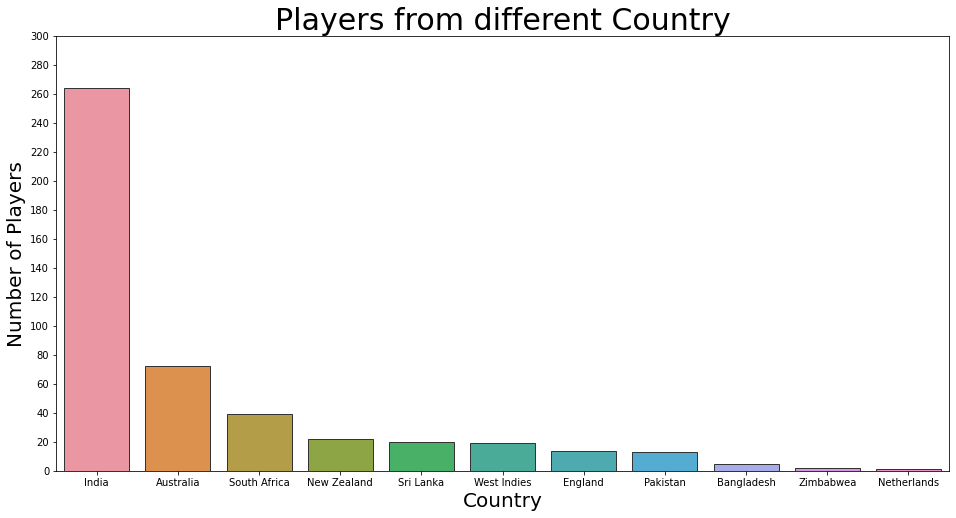

In [ ]:
player_country_data = players_df.groupby('Country').count().reset_index()
player_country_data.sort_values('Player_Name', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='Country', y='Player_Name', ax=axes, data=player_country_data,linewidth=1,edgecolor='0.2')
axes.set_yticks(range(0,301,20))
axes.set_xlabel('Country', size=20)
axes.set_ylabel('Number of Players', size=20)
axes.set_title('Players from different Country', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

# Venue

IPL matches are played on different cities.
Let's see which city have hosted most matches.

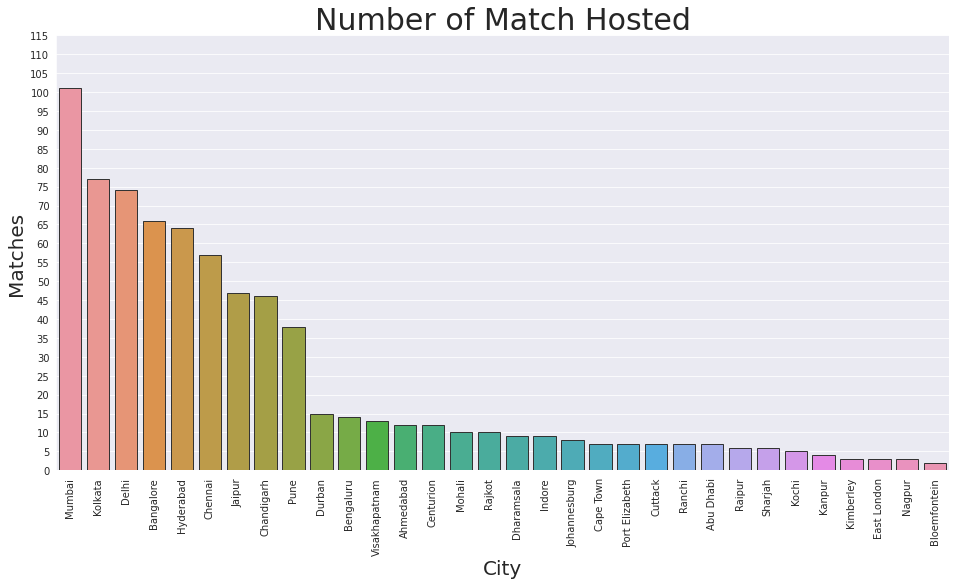

In [ ]:
city_data = matches_df.groupby('city').count().reset_index()
city_data.sort_values('id', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='city', y='id', ax=axes, data=city_data,linewidth=1,edgecolor='0.2')
axes.set_yticks(range(0,120,5))
axes.set_xlabel('City', size=20)
axes.set_ylabel('Matches', size=20)
axes.set_title('Number of Match Hosted', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_rotation(90)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)


# Number of matches per season

Let's see on average how many matches a season can have?

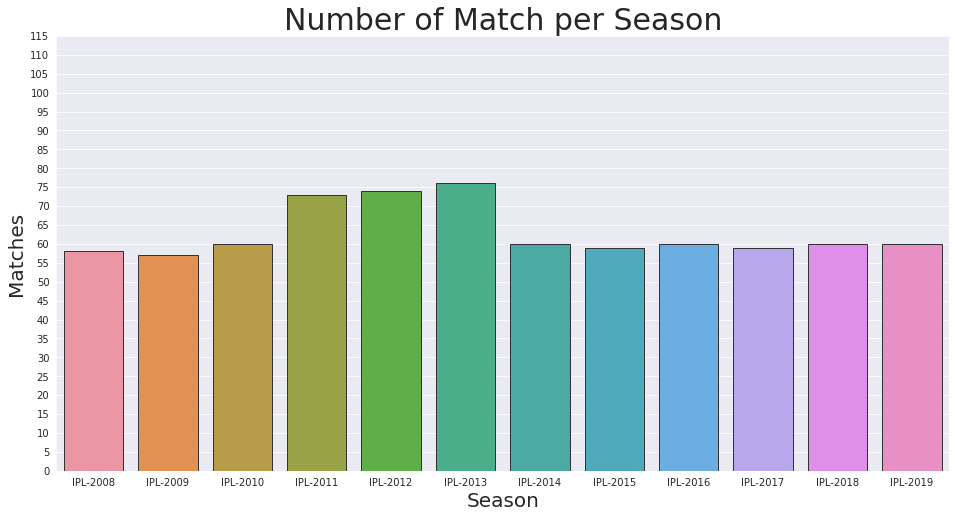

In [ ]:
matches_per_season = matches_df.groupby('Season').count().reset_index()
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='Season', y='id', ax=axes, data=matches_per_season, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,120,5))
axes.set_xlabel('Season', size=20)
axes.set_ylabel('Matches', size=20)
axes.set_title('Number of Match per Season', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)


# Boundries
How many boundries  for each season?

In [ ]:
# calculate number of 4's and 6's
# data frames for fours and sixes
fours_df = deliveries_df.loc[(deliveries_df['wide_runs'] == 4) | (deliveries_df['bye_runs'] == 4) | (deliveries_df['legbye_runs'] == 4) | \
                             (deliveries_df['noball_runs'] == 4) | (deliveries_df['penalty_runs'] == 4) | (deliveries_df['batsman_runs'] == 4)]
sixes_df = deliveries_df.loc[(deliveries_df['wide_runs'] == 6) | (deliveries_df['bye_runs'] == 6) | (deliveries_df['legbye_runs'] == 6) | \
                             (deliveries_df['noball_runs'] == 6) | (deliveries_df['penalty_runs'] == 6) | (deliveries_df['batsman_runs'] == 6)]
fours = fours_df.groupby('match_id')['total_runs'].sum().reset_index()
fours['Number of fours'] = fours['total_runs'].apply(lambda x: x//4)
sixes = sixes_df.groupby('match_id')['total_runs'].sum().reset_index()
sixes['Number of sixes'] = sixes['total_runs'].apply(lambda x: x//6)

# function to return total number of fours from given list of match ids
def get_fours(match_ids):
  total_fours = 0
  for id in match_ids:
    match = fours.loc[fours['match_id'] == id]
    total_fours += match.iloc[0]['Number of fours']
  return total_fours

# function to return total number of sixes from given list of match ids
def get_sixes(match_ids):
  total_sixes = 0
  for id in match_ids:
    match = sixes.loc[fours['match_id'] == id]
    total_sixes += match.iloc[0]['Number of sixes']
  return total_sixes

# season dataframe with total number of fours and sixes
seasons_df = matches_df.groupby('Season')['id'].unique().reset_index()
seasons_df['fours'] = seasons_df['id'].apply(lambda x: get_fours(x))
seasons_df['sixes'] = seasons_df['id'].apply(lambda x: get_sixes(x))
seasons_df.drop(columns='id', inplace=True)
seasons_df

,Season,fours,sixes
0,IPL-2008,1737,623
1,IPL-2009,1351,508
2,IPL-2010,1736,587
3,IPL-2011,1957,639
4,IPL-2012,1942,733
5,IPL-2013,2088,681
6,IPL-2014,1597,715
7,IPL-2015,1636,692
8,IPL-2016,1652,639
9,IPL-2017,1632,706


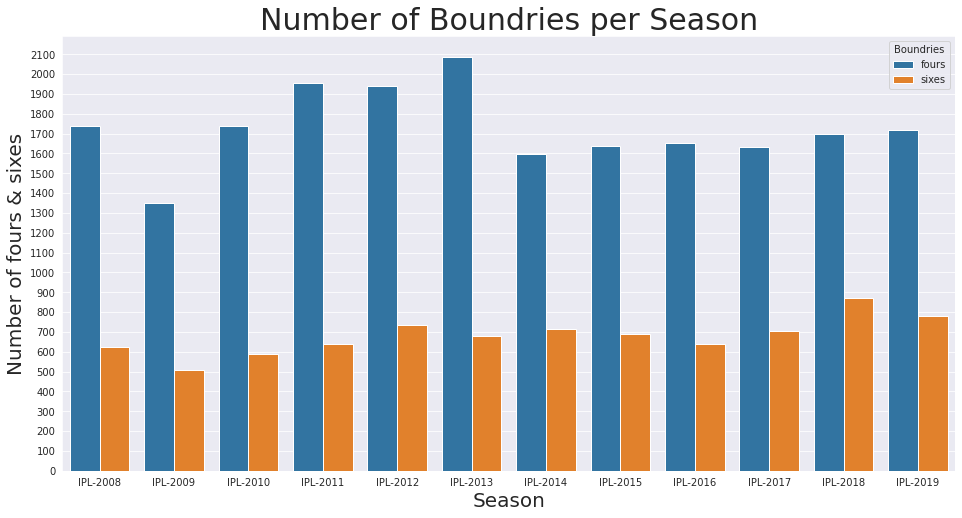

In [ ]:
# plot the graph
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
seasons_df = pd.melt(seasons_df, id_vars='Season', var_name='Boundries', value_name='Number of fours & sixes')
sns.barplot(x='Season', y='Number of fours & sixes', hue='Boundries', data=seasons_df, ax=axes)

axes.set_yticks(range(0,2200,100))
axes.set_xlabel('Season', size=20)
axes.set_ylabel('Number of fours & sixes', size=20)
axes.set_title('Number of Boundries per Season', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)


# Player of the match

player of the match award is given to the outstanding player in a particular match. This can be a player from either team, although the player is generally chosen from the winning team. 

Let's see the top 50 players who gets player of the match award most frequently.

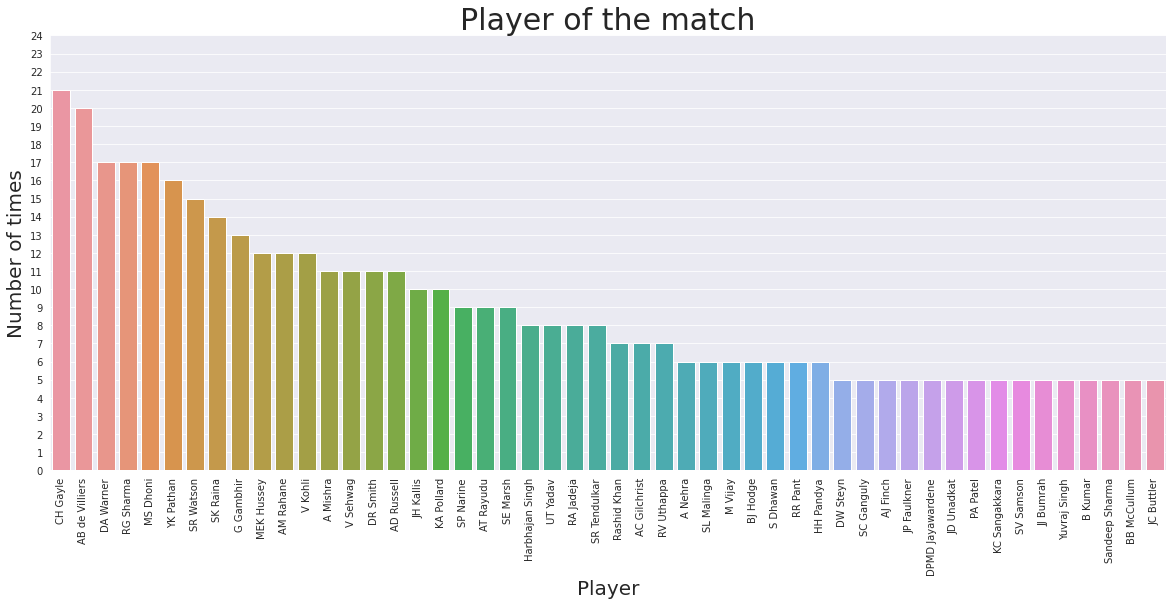

In [ ]:
player_of_match_data = matches_df['player_of_match'].value_counts()
player_of_match_data = player_of_match_data[:50]
fig, axes = plt.subplots(figsize=(20,8))
sns.set_style("darkgrid")
sns.barplot(x=player_of_match_data.index, y=player_of_match_data.values,ax=axes)
axes.set_yticks(range(0,25))
axes.set_xlabel('Player', size=20)
axes.set_ylabel('Number of times', size=20)
axes.set_title('Player of the match', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_rotation(90)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

# Team that win most matches

We offen intrested in finding out which team is best.

By best here we mean the team that win most matches. Let's have visual representation of data.

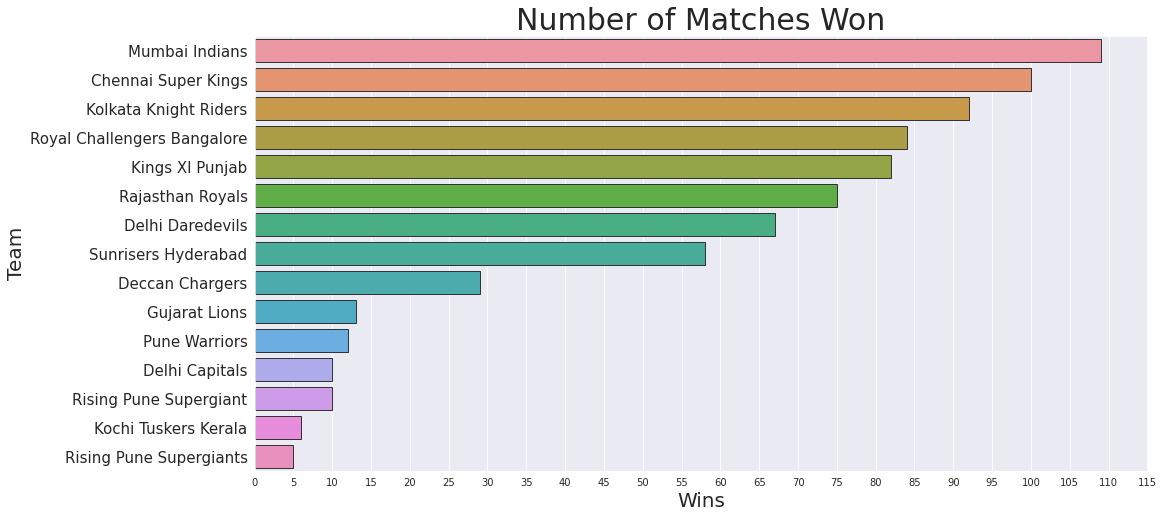

In [ ]:
winner_df = matches_df.groupby('winner')['id'].count().reset_index()
winner_df.sort_values('id', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(y='winner', x='id', ax=axes, data=winner_df, linewidth=1, edgecolor='0.2')
axes.set_xticks(range(0,120,5))
axes.set_ylabel('Team', size=20)
axes.set_xlabel('Wins', size=20)
axes.set_title('Number of Matches Won', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

# Toss winning
Does winning  the toss increases chance of winning the game?

In [ ]:
# create toss data by merging different dataframes
toss_win_df = matches_df.groupby('toss_winner')['result'].count().reset_index()
toss_win_df.rename(columns={'toss_winner':'team', 'result':'toss won'},inplace=True)
winner_df.rename(columns={'winner':'team', 'id':'match won'},inplace=True)
teams_toss_df = pd.merge(left=toss_win_df, right=winner_df, on='team')
bat_first_df = matches_df[matches_df['toss_decision'] == 'bat'].groupby('toss_winner')['result'].count().reset_index()
bat_first_df.rename(columns={'toss_winner':'team', 'result':'bat first'},inplace=True)
teams_toss_df = pd.merge(left=teams_toss_df, right=bat_first_df, on='team')
field_first_df = matches_df[matches_df['toss_decision'] == 'field'].groupby('toss_winner')['result'].count().reset_index()
field_first_df.rename(columns={'toss_winner':'team', 'result':'field first'},inplace=True)
teams_toss_df = pd.merge(left=teams_toss_df, right=field_first_df, on='team')
teams_toss_df

,team,toss won,match won,bat first,field first
0,Chennai Super Kings,89,100,48,41
1,Deccan Chargers,43,29,24,19
2,Delhi Capitals,10,10,2,8
3,Delhi Daredevils,80,67,29,51
4,Gujarat Lions,15,13,1,14
5,Kings XI Punjab,81,82,26,55
6,Kochi Tuskers Kerala,8,6,3,5
7,Kolkata Knight Riders,92,92,30,62
8,Mumbai Indians,98,109,44,54
9,Pune Warriors,20,12,11,9


Text(0.5, 0.98, 'Toss won to matches won')

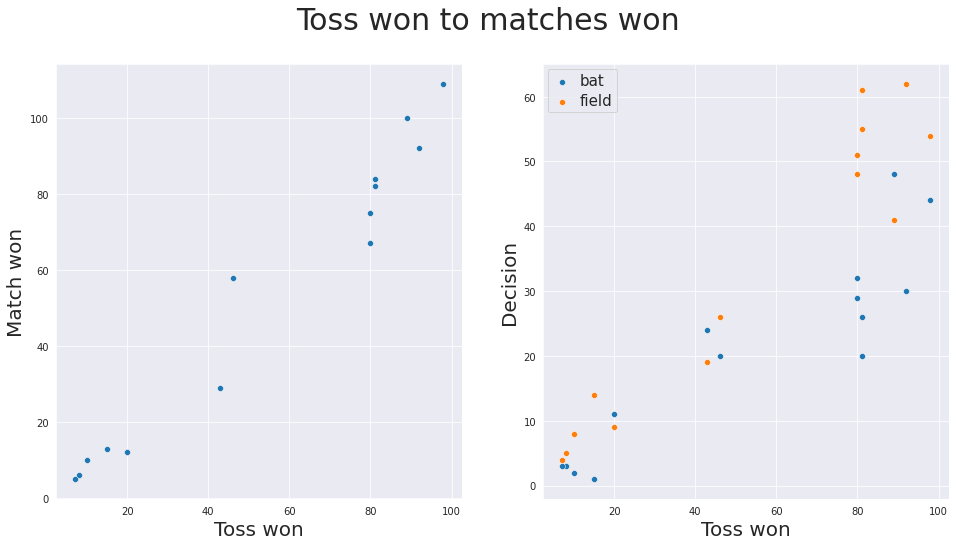

In [ ]:
# plot data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
sns.set_style("darkgrid")
sns.scatterplot(x='toss won', y='match won', data=teams_toss_df, ax=axes[0])
axes[0].set_xlabel('Toss won', size=20)
axes[0].set_ylabel('Match won', size=20)
sns.scatterplot(x='toss won', y='bat first', data=teams_toss_df, ax=axes[1])
sns.scatterplot(x='toss won', y='field first', data=teams_toss_df, ax=axes[1])
axes[1].set_xlabel('Toss won', size=20)
axes[1].set_ylabel('Decision', size=20)
axes[1].legend(labels=['bat', 'field'])
plt.setp(axes[1].get_legend().get_texts(), fontsize='15')
fig.suptitle('Toss won to matches won', size=30)

# Centuries

Let's see who scored most centuries in IPL

In [ ]:
# function to calculate half centuries
def get_half_centuries(runs):
  runs = runs % 100
  return runs//50

# function to calculate centuries
def get_centuries(runs):
  return runs//100

# calculate half-centuries and centuries for each batsman
batsman_df = deliveries_df.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_df['half_centuries'] = batsman_df['batsman_runs'].apply(lambda x: get_half_centuries(x))
batsman_df['centuries'] = batsman_df['batsman_runs'].apply(lambda x: get_centuries(x))
batsman_df = batsman_df.groupby('batsman').sum().reset_index()
batsman_df

,batsman,match_id,batsman_runs,half_centuries,centuries
0,A Ashish Reddy,10360,280,0,0
1,A Chandila,780,4,0,0
2,A Chopra,607,53,0,0
3,A Choudhary,73,25,0,0
4,A Dananjaya,7902,4,0,0
...,...,...,...,...,...
511,YV Takawale,2973,192,0,0
512,Yashpal Singh,580,47,0,0
513,Younis Khan,97,3,0,0
514,Yuvraj Singh,127529,2765,13,0


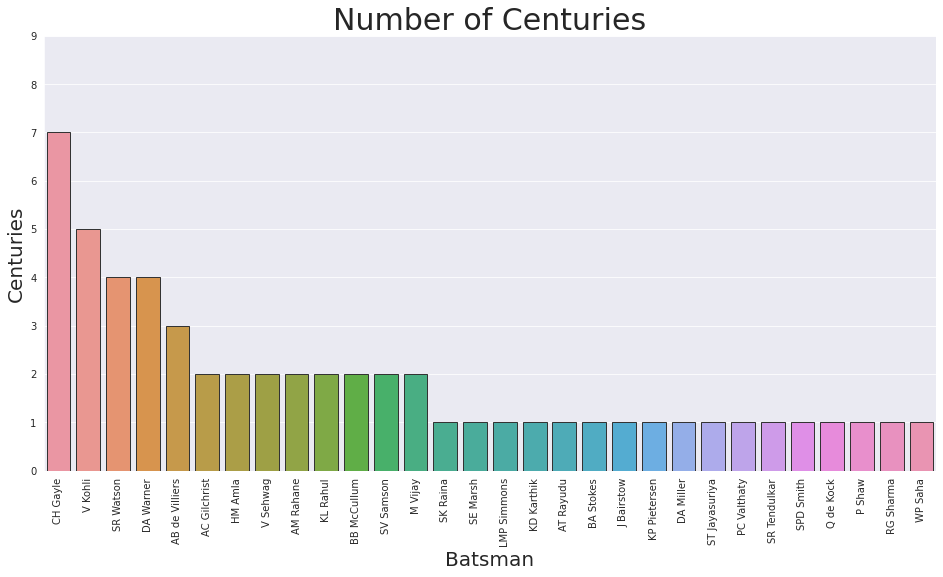

In [ ]:
batsman_centuries_df = batsman_df.sort_values('centuries', ascending=False)
batsman_centuries_df = batsman_centuries_df[0:30]
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='batsman', y='centuries', ax=axes, data=batsman_centuries_df, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,10))
axes.set_xlabel('Batsman', size=20)
axes.set_ylabel('Centuries', size=20)
axes.set_title('Number of Centuries', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_rotation(90)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

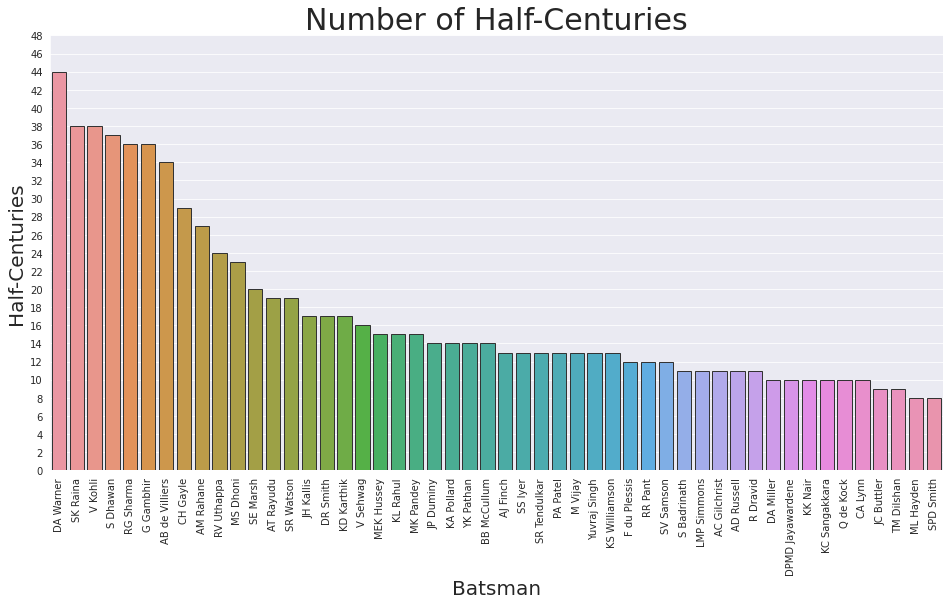

In [ ]:
batsman_half_centuries_df = batsman_df.sort_values('half_centuries', ascending=False)
batsman_half_centuries_df = batsman_half_centuries_df[0:50]
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='batsman', y='half_centuries', ax=axes, data=batsman_half_centuries_df, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,50,2))
axes.set_xlabel('Batsman', size=20)
axes.set_ylabel('Half-Centuries', size=20)
axes.set_title('Number of Half-Centuries', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_rotation(90)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

In [ ]:
team = teamwise_home_and_away_df['team'].loc[0:13]

In [ ]:
length_of_team = np.array(len(team))

In [ ]:
length_of_team

array(14)

In [ ]:
home_wins_of_team = teamwise_home_and_away_df['home_wins']

In [ ]:
home_wins_of_team

0      5
1     58
2     51
3      3
4     30
5     29
6     18
7     38
8     35
9     34
10    25
11     6
12     2
13     1
Name: home_wins, dtype: int64

In [ ]:
away_wins_of_team = teamwise_home_and_away_df['away_wins']

In [ ]:
away_wins_of_team

0      5
1     51
2     49
3      7
4     28
5     46
6     11
7     44
8     49
9     58
10    42
11     6
12     4
13    12
Name: away_wins, dtype: int64

Text(0, 0.5, 'Wins at Home & Away')

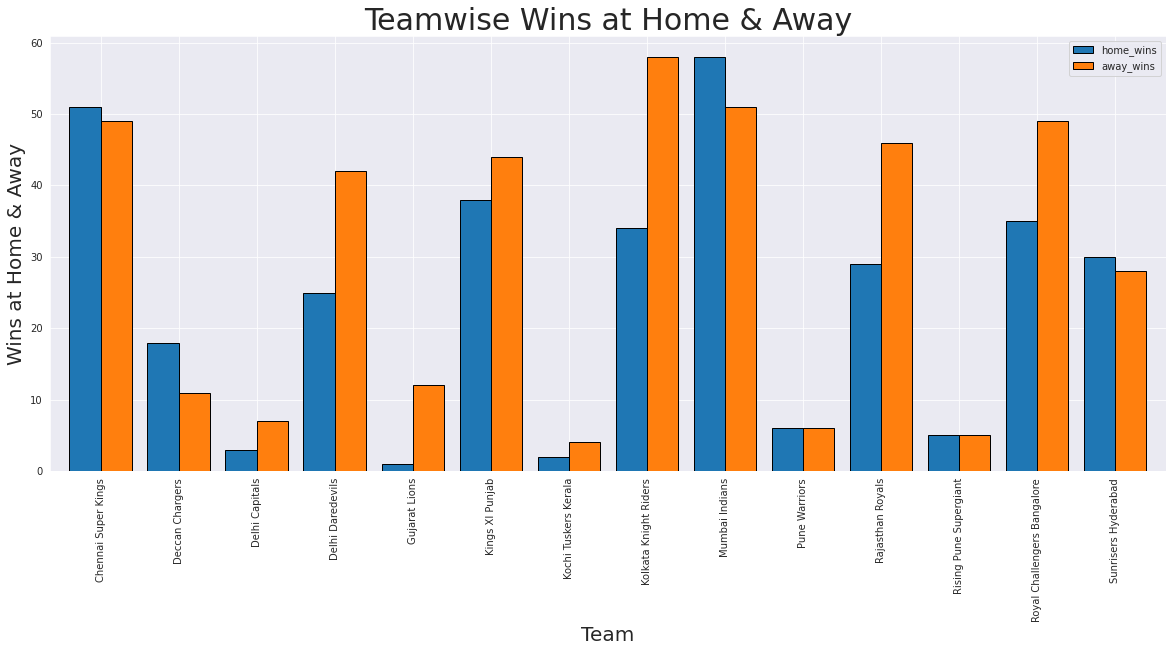

In [ ]:
# Create the figure object 
qw = teamwise_home_and_away_df.groupby(['team'])[['home_wins','away_wins']].mean().plot.bar(
    width=0.8,
    linewidth= 1,
    edgecolor='black',
    figsize = (20,8),
    fontsize = 10,
)
plt.yticks(ticks = [x for x in range(0,70,10)])
plt.xticks(rotation = 90)
qw.set_title("Teamwise Wins at Home & Away", fontsize = 30)

# Set x-labels
qw.set_xlabel("Team", fontsize = 20)
qw.set_ylabel("Wins at Home & Away", fontsize = 20)

#**MOST_RUNS_AVERAGE_STRIKERATE**

**MOST RUNS BY THE BATSMAN**

In [ ]:
most_runs_by_batsman = most_runs_average_strikerate_df["total_runs"].loc[:9]

In [ ]:
most_runs_by_batsman

0    5426
1    5386
2    4902
3    4717
4    4601
5    4525
6    4450
7    4420
8    4414
9    4219
Name: total_runs, dtype: int64

In [ ]:
mostruns_batsman_name = most_runs_average_strikerate_df["batsman"].loc[:9]

In [ ]:
mostruns_batsman_name

0           V Kohli
1          SK Raina
2         RG Sharma
3         DA Warner
4          S Dhawan
5          CH Gayle
6          MS Dhoni
7        RV Uthappa
8    AB de Villiers
9         G Gambhir
Name: batsman, dtype: object

<BarContainer object of 10 artists>

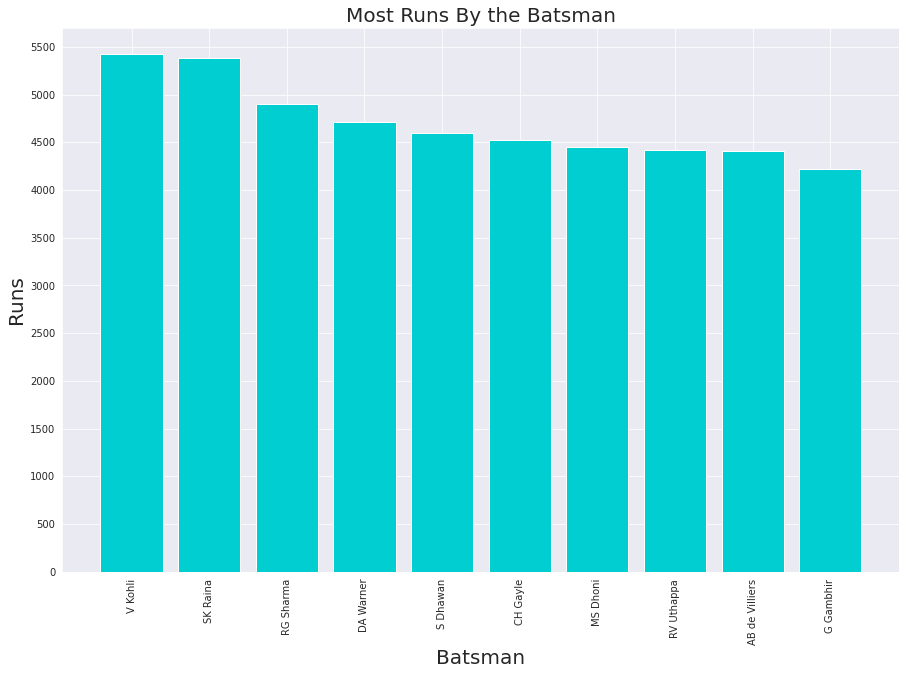

In [ ]:
# Create the figure object(Most Runs By the Batsman)

plt.rcParams['figure.figsize'] = (15, 10)
plt.title("Most Runs By the Batsman",fontsize = 20)
plt.yticks(ticks = [x for x in range(0,6000,500)])
plt.xticks(rotation = 90)
plt.xlabel('Batsman',fontsize = 20)
plt.ylabel('Runs',fontsize = 20)
plt.bar(mostruns_batsman_name, most_runs_by_batsman, color='DARKTURQUOISE')

**AVERAGE OF THE BATSMAN**

In [ ]:
batsman_average = pd.DataFrame(most_runs_average_strikerate_df.groupby(['batsman']).agg({'total_runs' : 'sum','out' : 'sum'}))
batsman_average["average"] = batsman_average['total_runs']/batsman_average['out']
batsman_average = batsman_average.sort_values(by = 'average',ascending = False)
batsman_average[batsman_average['total_runs'] > 2500]

,total_runs,out,average
batsman,,,
AB de Villiers,4414,104,42.442308
DA Warner,4717,114,41.377193
CH Gayle,4525,110,41.136364
MS Dhoni,4450,118,37.711864
V Kohli,5426,152,35.697368
SK Raina,5386,160,33.662500
S Dhawan,4601,137,33.583942
AM Rahane,3834,117,32.769231
G Gambhir,4219,134,31.485075


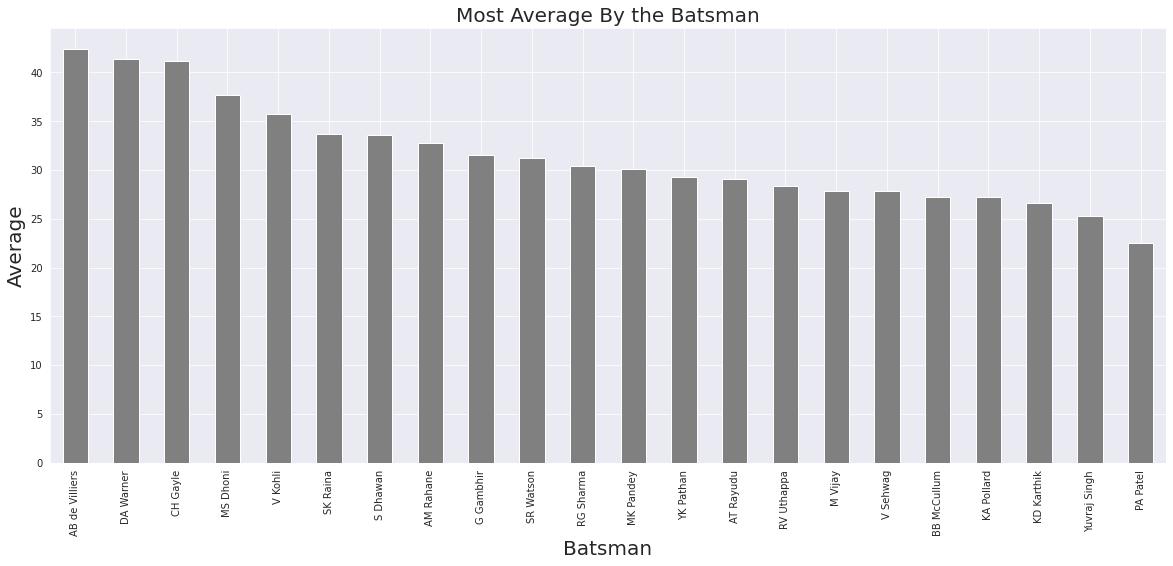

In [ ]:
# Create the figure object(Most Average By the Batsman)

plt.rcParams['figure.figsize'] = 20,8
colors = (np.linspace(0,1,len(batsman_average[batsman_average['total_runs'] > 2500])))
batsman_average[batsman_average['total_runs'] > 2500].plot(kind = 'bar',y = "average", color = 'grey',legend = '',fontsize = 10)
plt.title("Most Average By the Batsman",fontsize = 20)
plt.xlabel('Batsman',fontsize = 20)
plt.ylabel('Average',fontsize = 20)
plt.show()

**MOST STRIKE RATE BY THE BATSMAN**

In [ ]:
batsman_strikerate = pd.DataFrame(most_runs_average_strikerate_df.groupby(['batsman']).agg({'total_runs' : 'sum','numberofballs' : 'sum'}))
batsman_strikerate['strikerate'] = batsman_strikerate['total_runs']/batsman_strikerate['numberofballs']*100
batsman_strikerate = batsman_strikerate.sort_values(by ='strikerate' , ascending = False)
batsman_strikerate[batsman_strikerate['total_runs'] > 2500]
# We have taken runs greater then 2500 So that we take a significant amount of runs

,total_runs,numberofballs,strikerate
batsman,,,
V Sehwag,2728,1746,156.242841
CH Gayle,4525,2972,152.254374
AB de Villiers,4414,2902,152.101999
KA Pollard,2772,1879,147.525279
YK Pathan,3222,2240,143.839286
DA Warner,4717,3292,143.286756
SR Watson,3590,2566,139.906469
MS Dhoni,4450,3206,138.802246
SK Raina,5386,3916,137.538304


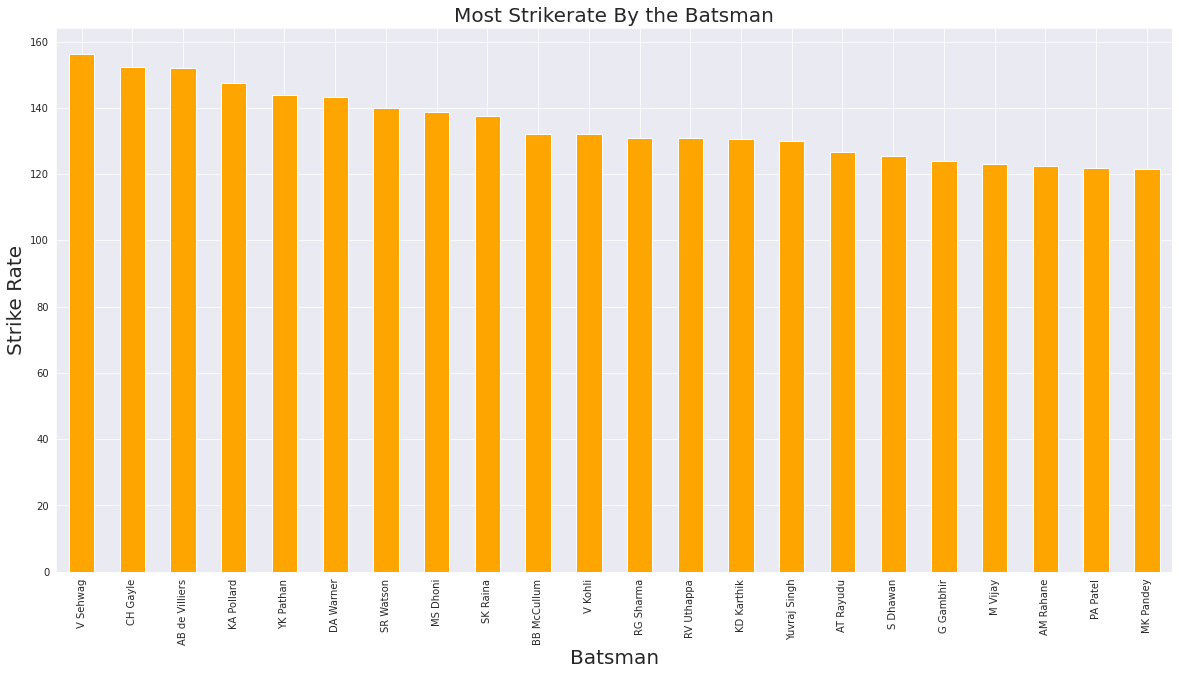

In [ ]:
# Create the figure object(Most Strikerate By the Batsman)

plt.rcParams['figure.figsize'] = 20,10
colors = (np.linspace(0,1,len(batsman_strikerate[batsman_strikerate['total_runs'] > 2500])))
batsman_strikerate[batsman_strikerate['total_runs'] > 2500].plot(kind = 'bar',y = "strikerate", color = 'orange',legend = '',fontsize = 10)
plt.title("Most Strikerate By the Batsman",fontsize = 20)
plt.xlabel('Batsman',fontsize = 20)
plt.ylabel('Strike Rate',fontsize = 20)
plt.show()


#NUMBER OF WICKETS TAKEN BY THE BOWLER

**Bowling, in cricket, is the action of propelling the ball toward the wicket defended by a batsman. A player skilled at bowling is called a bowler; a bowler who is also a competent batsman is known as an all-rounder - Wikipedia**

**A bowler is said to have taken wickets for himself when the dismissal kinds are as follows:**
> caught

> bowled

> lbw

> caught and bowled

> stumped

**We need to create a new DataFrame say bowlers, and get the count of the above dismissal grouped by a player(bowler). Our target is to get all the bowlers who has taken 100 or more wickets.**

In [ ]:
bowlers = deliveries_df[['bowler','dismissal_kind']]
bowlers = bowlers[(bowlers.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']))]
bowlers = bowlers.groupby('bowler').count().reset_index()
bowlers.rename(columns={'dismissal_kind':'no_of_wickets'}, inplace=True)
bowlers = bowlers.sort_values(by='no_of_wickets', ascending=False)
bowlers = bowlers[(bowlers.no_of_wickets>=100)]
bowlers

,bowler,no_of_wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,149
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


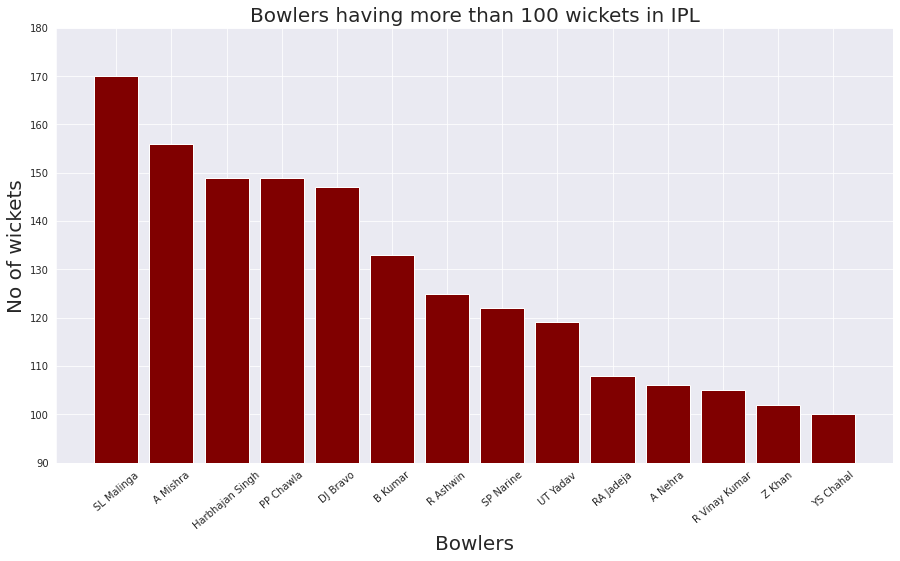

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(bowlers.bowler, bowlers.no_of_wickets, color = 'maroon')
plt.xticks(rotation=40)
plt.ylim(90,180)
plt.title('Bowlers having more than 100 wickets in IPL',fontsize = 20)
plt.xlabel('Bowlers',fontsize = 20)
plt.ylabel('No of wickets',fontsize = 20)
plt.show()

#Let's look at the batting and bowling styles of IPL Players

#BATTING_HAND

In [ ]:
Battinghand = players_df["Batting_Hand"]

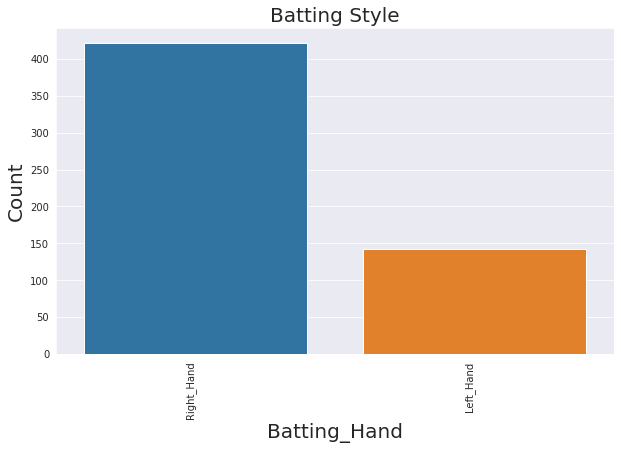

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Batting_Hand', data=players_df, order=pd.value_counts(players_df['Batting_Hand']).iloc[:2].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Batting Style',fontsize = 20)
plt.xlabel('Batting_Hand',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

#BOWLING SKILL

In [ ]:
Bowlingskill = players_df["Bowling_Skill"]

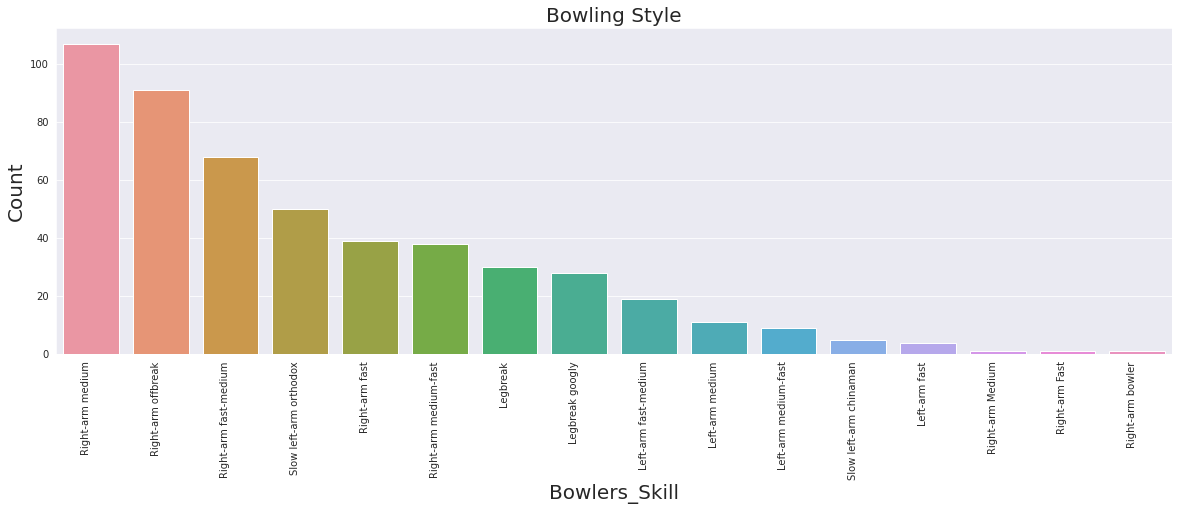

In [ ]:
#Bowling skill Graph

plt.figure(figsize=(20,6))
ax=sns.countplot(x='Bowling_Skill', data=players_df, order=pd.value_counts(players_df['Bowling_Skill']).iloc[:16].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Bowling Style',fontsize = 20)
plt.xlabel('Bowlers_Skill',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

### Comparison of Teams

In [ ]:
# Finding the series of teams to find the winners and loser
team_winner_df = matches_df['winner']

In [ ]:
def the_lossing_team(team1,team2,winner):
  if team1!=winner:
    return team1
  else:
    return team2

In [ ]:
the_teamcomparison_df= matches_df.copy()
the_teamcomparison_df['loosing team']=the_teamcomparison_df.apply(lambda x:the_lossing_team(x['team1'],x['team2'],x['winner']),axis=1)

In [ ]:
the_teamcomparison_df=the_teamcomparison_df.groupby(['winner','loosing team'])['result'].count().reset_index()

In [ ]:
the_team_vs_team_df= teams_df.copy()
the_team_vs_team_df.rename(columns={'team1':'teams'},inplace=True)

In [ ]:
teams_list= the_team_vs_team_df['teams']
for team in teams_list:
  the_team_vs_team_df[team]=0
the_team_vs_team_df=the_team_vs_team_df.set_index('teams')

In [ ]:
for value in range(len(the_teamcomparison_df)):
  the_team_vs_team_df[the_teamcomparison_df.iloc[value]['winner']][the_teamcomparison_df.iloc[value]['loosing team']]=the_teamcomparison_df.iloc[value]['result']
  

Text(0.5, 1.0, 'The Comparison between teams')

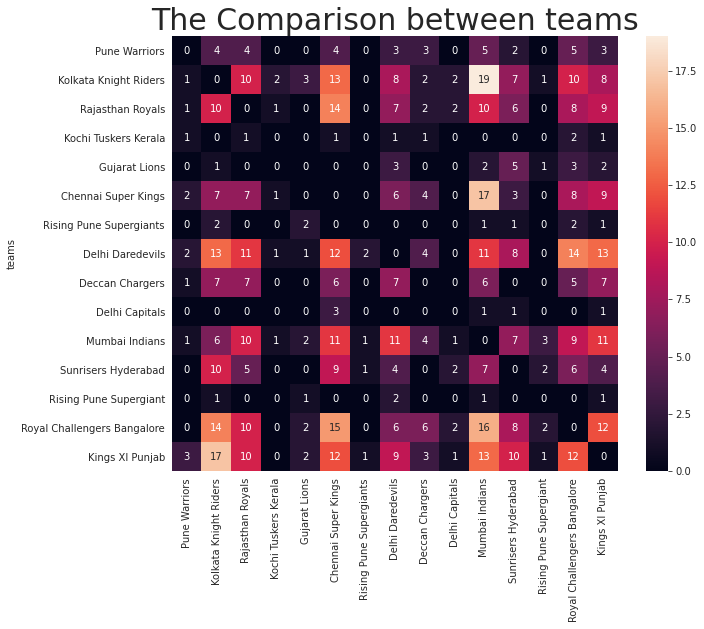

In [ ]:
fig, axis=plt.subplots(figsize=(10,8))
sns.heatmap(the_team_vs_team_df,annot=True)
axis.set_title("The Comparison between teams",size=30)

### To identify which Batsman Played the most number of dot balls

In [ ]:
Dot_balls_df = deliveries_df.loc[(deliveries_df['batsman_runs'] ==0)]

In [ ]:
Dot_balls_df1 = Dot_balls_df['batsman'].value_counts().reset_index()
Dot_balls_df1.rename(columns={'index':'Batsman','batsman':'dot_balls'},inplace=True)

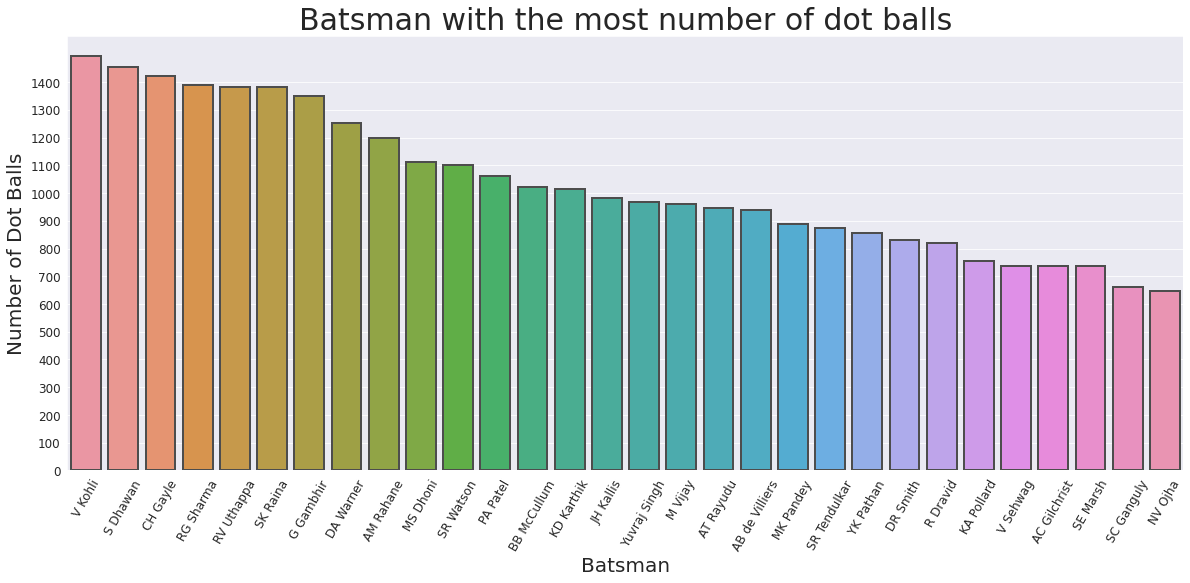

In [ ]:
players_dot_balls = Dot_balls_df1[:30]
fig, axes = plt.subplots(figsize=(20,8))
sns.set_style("darkgrid")
sns.barplot(x='Batsman', y='dot_balls',ax=axes,data=players_dot_balls, linewidth=2, edgecolor='0.3')
axes.set_yticks(range(0,1500,100))
axes.set_xlabel('Batsman', size=20)
axes.set_ylabel('Number of Dot Balls', size=20)
axes.set_title('Batsman with the most number of dot balls', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    tick.label.set_rotation(60)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)


### Most Common dismissal types in IPL

In [ ]:
dismissal_df= deliveries_df.groupby(['dismissal_kind']).count()
dismissal_df = dismissal_df['inning'].reset_index()
dismissal_df

,dismissal_kind,inning
0,bowled,1581
1,caught,5348
2,caught and bowled,211
3,hit wicket,10
4,lbw,540
5,obstructing the field,2
6,retired hurt,12
7,run out,852
8,stumped,278


In [ ]:
dismissal_df.rename(columns={'inning':'Count'},inplace=True)
dismissal_df

,dismissal_kind,Count
0,bowled,1581
1,caught,5348
2,caught and bowled,211
3,hit wicket,10
4,lbw,540
5,obstructing the field,2
6,retired hurt,12
7,run out,852
8,stumped,278


Text(0.5, 1.0, 'Most Comman Dismissal Types')

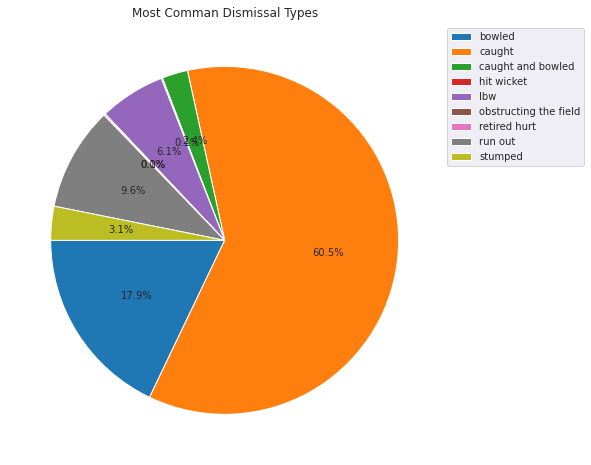

In [ ]:
plt.figure(figsize=(16,8))
plt.pie(x=dismissal_df['Count'],autopct='%1.1f%%',startangle=180)
plt.legend(labels=dismissal_df['dismissal_kind'],bbox_to_anchor=(1,1))
plt.title('Most Comman Dismissal Types')

## Conclusion

That's it! We are here at the end of our exercise.

Throughout this Process we put in practice many of the strategies to get our desired output. We analysed each and every data sheets so as to get the desired outputs related to teams, there performance, the players and there performances, to find the best batsman the best bowlers the no of boundaries etc. we analysed which team players are the best for bowling and which are best for batting alone, we dealt with permutation and combinations to find out the desired outputs related to boundaries. That's a lot of work that Python helped us make easier.

# Here we can conclude the following:

1.The number of matches each season is lies between 50 to 80 matches

2.The most number of Matches were hosted in Mumbai and the list were hosted in  Venue Bloemfontein

3.The most number of players were from India and the least number of players were playing from Netherland

4.The team who choose to bat after winning the toss won more matches than those teams who choose to field.

5.The  most number of Matches were eon by Mumbai Indians with around 109 wins.

6.In team comparison we observed that Kolkata Knight Riders lose most of the matches winning more than 19 matches.

7.The batsman who played most number of dot balls is Virat Kohli and the batsman who played the least number of dot balls was N.V.Ojha

8.The most Dismissal type in IPL is stumped out.

9.The most Half Centuries was scored by D.A.Warner.

10.The Player who won most of the Man of The Match was Chris Gayle

11.The average number of Four's and Six's per season lies somewhere around 1800 and 850 respectively.

12.The most full centuries was scored by Chris Gayle.


But whatever it is we can not define which team will help us win because at the end the players here are not a machine and the performance of the players either improve by practice or decreases due to some other factors so we can only analyse the past data. Now all we can do is Analyse and see the performance to increase or decrease because Sports is something that doesn't only depend upon the players but also many other factors ex.Climatic Condition. So, we will see you in next IPL....